<a href="https://colab.research.google.com/github/beurredar/cao-zdravo/blob/main/Second_Hand_Online_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second Hand Online Market Analysis

## Hypothesis

xxx

## Dataset

Source: https://www.kaggle.com/datasets/justinpakzad/vestiaire-fashion-dataset/data

## Analysis

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
!pip install -q gdown
import gdown

# Download the file
gdown.download('https://drive.google.com/uc?id=1AjpfaJGZ5GAmkTn_wqiRs75r0CfLhcDa', 'vestiaire.csv', quiet=False)

# Load it into pandas
import pandas as pd
df = pd.read_csv('vestiaire.csv')
df.head(20)


Downloading...
From (original): https://drive.google.com/uc?id=1AjpfaJGZ5GAmkTn_wqiRs75r0CfLhcDa
From (redirected): https://drive.google.com/uc?id=1AjpfaJGZ5GAmkTn_wqiRs75r0CfLhcDa&confirm=t&uuid=4153785f-2ed6-4560-b418-3e776379a3f4
To: /content/vestiaire.csv
100%|██████████| 493M/493M [00:03<00:00, 139MB/s]


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0
5,43246347,Mid-length dress,Mid,"See By Chloe white dress, size 42 IT (size lik...",See by Chloé Cotton - elasthane Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,3062607,julie3062607,1-2 days,France,3.0,22.0,493200.0,21.0,100.0
6,43246327,Silk trousers,Silk trousers Just Cavalli Black size 40 IT in...,Amazing flamingo three quarters trousers 100 s...,Just Cavalli Silk Trousers,Women,Women Clothing,All seasons,Never worn,1.0,...,Tourcoing,26079249,trulavina26079249,NaN,Belgium,0.0,8.0,0.0,5.0,0.0
7,43246317,Silk mid-length dress,Silk mid,Plaid sleeveless below knee silk dress. Worn ...,J.Crew Silk Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,19210149,catriona19210149,6-7 days,Ireland,40.0,41.0,0.0,43.0,82.0
8,43246287,Suit jacket,Suit jacket Aquascutum Beige size 46 IT in Cot...,Aquascutum classic cut short sleeve jacket and...,Aquascutum Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,14857400,navi2018,1-2 days,Italy,26.0,49.0,283504.0,34.0,96.0
9,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Tweed suit with lace edges. In perfect conditi...,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,2709130,simo2709130,1-2 days,Italy,172.0,6.0,4692.0,375.0,95.0


In [2]:
# The summary information about the DataFrame
df.info()

KeyboardInterrupt: 

In [ ]:
df.dtypes


,0
product_id,int64
product_type,object
product_name,object
product_description,object
product_keywords,object
product_gender_target,object
product_category,object
product_season,object
product_condition,object
product_like_count,float64


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.isnull().sum()


,0
product_id,0
product_type,0
product_name,0
product_description,7
product_keywords,1183
product_gender_target,0
product_category,1183
product_season,2
product_condition,0
product_like_count,0


# **I am not sure what to do with the product_category column, as it is important and it has a lot of missing values (approx. 1%)**

In [3]:
df.fillna({'product_description': 'N/A',
           'product_material': 'N/A',
           'product_color': 'N/A'}, inplace=True)

In [4]:
df.drop(['seller_username', 'product_id', 'product_category', 'brand_id', 'seller_id', 'usually_ships_within', 'buyers_fees', 'product_season', 'has_cross_border_fees', 'product_keywords'], axis=1, inplace=True)
df.head()

,product_type,product_name,product_description,product_gender_target,product_condition,product_like_count,sold,reserved,available,in_stock,...,seller_price,seller_earning,seller_badge,warehouse_name,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Women,Never worn,34.0,True,False,True,False,...,223.65,216.94,Common,Tourcoing,Germany,3.0,14.0,0.0,13.0,0.0
1,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Women,Very good condition,1.0,False,False,True,False,...,106.50,106.50,Common,Tourcoing,Belgium,0.0,0.0,0.0,8.0,0.0
2,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Women,Very good condition,2.0,False,False,True,False,...,1065.00,926.55,Expert,Tourcoing,Spain,58.0,69.0,0.0,62.0,96.0
3,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,Women,Very good condition,0.0,False,False,True,False,...,149.00,126.65,Expert,Brooklyn,United States,63.0,274.0,126346.0,131.0,96.0
4,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,Women,Very good condition,1.0,False,False,True,False,...,99.77,83.55,Common,Crawley,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [5]:
df.isnull().sum()


,0
product_type,0
product_name,0
product_description,0
product_gender_target,0
product_condition,0
product_like_count,0
sold,0
reserved,0
available,0
in_stock,0


In [ ]:
df.describe()


,product_like_count,price_usd,seller_price,seller_earning,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,6.298326,386.862536,331.639409,290.436463,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,12.920079,1859.559156,1591.472807,1498.157606,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,0.000000,6.130000,5.110000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,1.000000,83.070000,71.360000,58.580000,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,3.000000,168.700000,143.780000,125.370000,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,7.000000,350.000000,298.200000,261.900000,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,3154.000000,632610.000000,527175.000000,509229.750000,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [ ]:
outlier_cols = [
    'product_like_count', 'price_usd', 'seller_price',
    'seller_earning', 'seller_products_sold', 'seller_num_products_listed', 'seller_num_followers', 'seller_community_rank'
]

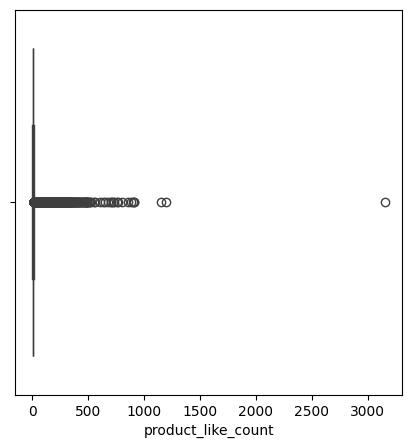

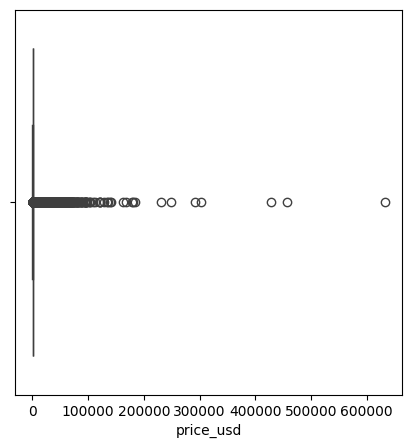

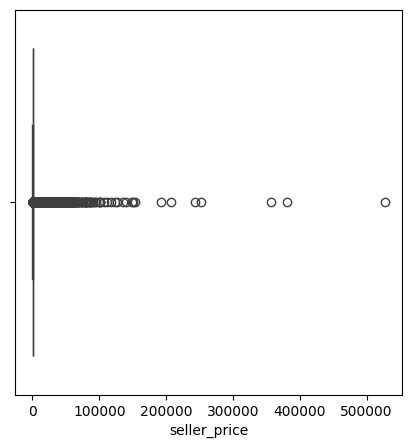

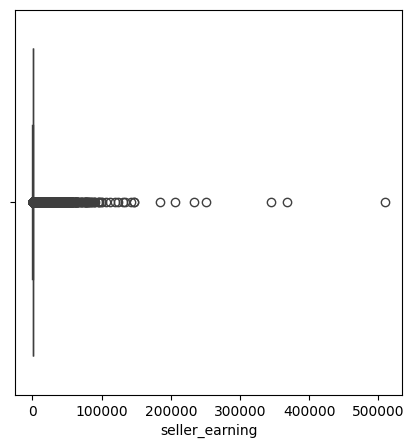

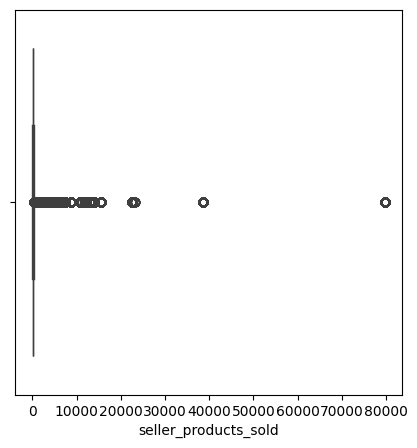

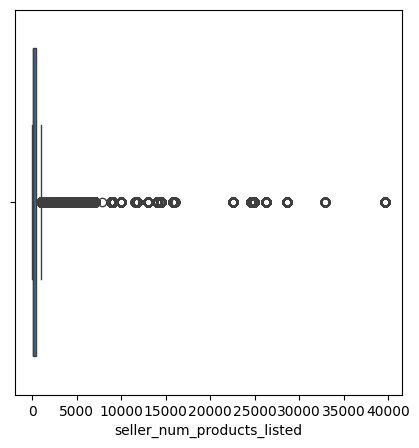

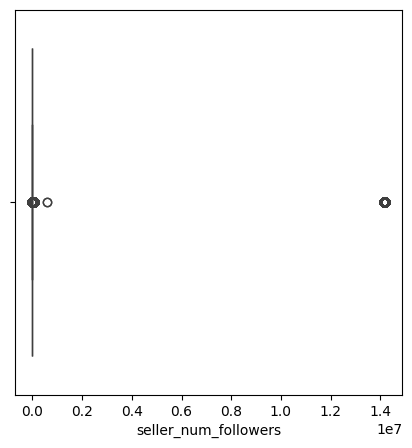

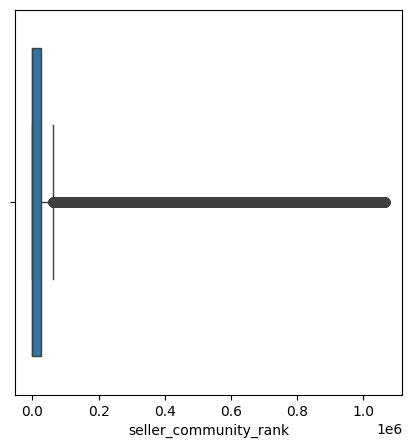

In [ ]:
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

for col in df_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(df[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

product_like_count: 12580
price_usd: 4654
seller_price: 4622
seller_earning: 4249
seller_products_sold: 11775
seller_num_products_listed: 23414
seller_community_rank: 28716
seller_num_followers: 568
seller_pass_rate: 3


In [ ]:
z_scores = np.abs(stats.zscore(df_numeric))

# DataFrame without outliers
df_wo_outliers = df[(z_scores < 3).all(axis=1)]
df_wo_outliers.shape

(827208, 27)

In [ ]:
df_wo_outliers


,product_type,product_name,product_description,product_gender_target,product_category,product_condition,product_like_count,sold,reserved,available,...,seller_price,seller_earning,seller_badge,warehouse_name,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Women,Women Clothing,Never worn,34.0,True,False,True,...,223.65,216.94,Common,Tourcoing,Germany,3.0,14.0,0.0,13.0,0.0
1,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Women,Women Clothing,Very good condition,1.0,False,False,True,...,106.50,106.50,Common,Tourcoing,Belgium,0.0,0.0,0.0,8.0,0.0
2,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Women,Women Clothing,Very good condition,2.0,False,False,True,...,1065.00,926.55,Expert,Tourcoing,Spain,58.0,69.0,0.0,62.0,96.0
3,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,Women,Women Clothing,Very good condition,0.0,False,False,True,...,149.00,126.65,Expert,Brooklyn,United States,63.0,274.0,126346.0,131.0,96.0
4,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,Women,Women Clothing,Very good condition,1.0,False,False,True,...,99.77,83.55,Common,Crawley,United Kingdom,19.0,14.0,102821.0,40.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900508,Cloth heels,Cloth heels Louis Vuitton Gold size 40 IT in C...,Beautiful and classic women's Louis Vuitton Go...,Women,Women Shoes,Never worn,7.0,False,False,True,...,548.71,532.25,Expert,Crawley,United Kingdom,22.0,15.0,301568.0,28.0,90.0
900509,Glitter trainers,Glitter trainers Bally Gold size 38 EU in Glit...,"Bally Vita Parcours sneakers. PPleather, suede...",Women,Women Shoes,Good condition,1.0,False,False,True,...,74.55,60.71,Expert,Tourcoing,Italy,40.0,17.0,391778.0,104.0,100.0
900510,Leather heels,Leather heels Casadei Black size 38.5 EU in Le...,Trendy and classic Casadei high-heel pumps Mad...,Women,Women Shoes,Good condition,1.0,False,False,True,...,127.80,108.63,Expert,Tourcoing,Austria,26.0,99.0,51408.0,75.0,89.0
900511,Leather cowboy boots,Leather cowboy boots Ash Black size 36 EU in L...,Very good quality leather boots Worn once Elas...,Women,Women Shoes,Very good condition,0.0,False,False,True,...,159.75,138.98,Common,Tourcoing,France,0.0,2.0,0.0,3.0,0.0
